In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Exploration

In [2]:
def prep1(name_of_csv):
    file = pd.read_csv(str(name_of_csv))
    file.set_index("Access_ID",inplace=True)
    
    file["Date"]= pd.to_datetime(file["Date"])
    file["Weekday"]=file["Date"].dt.weekday
    file["Month"]=file["Date"].dt.month
    file["Day"]=file["Date"].dt.day
    file['Covid'] = np.where((file['Date'] >= '01-May-20'),1,0)


    
    # we can see a significant increase in demand in the first of the month compared to the last of the month
    # that is why we are engineer a new binary feature "LotMonth" ("Last of the Month")
    def check_if_last_day_of_week(date):
            import datetime
            import calendar
            #  calendar.monthrange return a tuple (weekday of first day of the 
            #  month, number  
            #  of days in month)
            last_day_of_month = calendar.monthrange(date.year, date.month)[1]
            # here i check if date is last day of month
            if date == datetime.date(date.year, date.month, last_day_of_month):
                return 1
            return 0
    file["LotMonth"] = file.apply(lambda x: check_if_last_day_of_week(x["Date"]), axis=1)
    file["Is31"] = 0
    file.loc[file["Date"].dt.day == 31,"Is31"] = 1
    if "Buy" in file.columns:
        buy = file["Buy"].tolist()

        file=file.drop(columns=["Date","Buy","Day"])
        file["Buy"] = buy
        file.groupby("LotMonth")[["Buy"]].mean()  #here we can see, that the last day of the month
                                                #has no siginficant impact on our target
            
    else:
        file=file.drop(columns=["Date","Day"])
    metric_cols = ["AccountMng_Pages","AccountMng_Duration","FAQ_Pages","FAQ_Duration","Product_Pages","Product_Duration","GoogleAnalytics_BounceRate","GoogleAnalytics_ExitRate","GoogleAnalytics_PageValue","Month"]
    non_metric_features = file.columns[~file.columns.isin(metric_cols)]
    return file,metric_cols,non_metric_features

In [5]:
file,metric_cols,nonmetric_cols = prep1("train.csv")

<ipython-input-2-b3baa90ea779>:23: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if date == datetime.date(date.year, date.month, last_day_of_month):


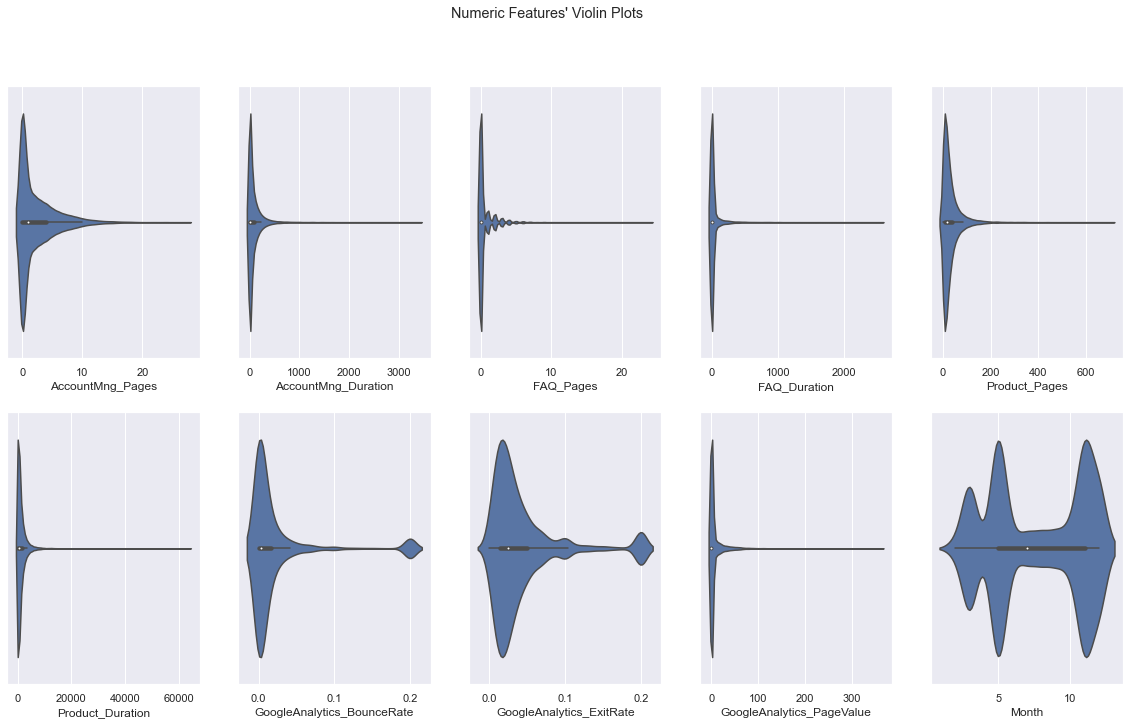

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_cols) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_cols): # Notice the zip() function and flatten() method
    sns.violinplot(x=file[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Features' Violin Plots"

plt.suptitle(title)

plt.show()

In [7]:
file[(file["Product_Pages"] == 1) & (file["Product_Duration"]==0.0)]

AccountMng_Pages  AccountMng_Duration  FAQ_Pages  FAQ_Duration  \
Access_ID                                                                   
103674236                 0                  0.0          0           0.0   
103778619                 0                  0.0          0           0.0   
104571401                 0                  0.0          0           0.0   
105317095                 0                  0.0          0           0.0   
105337816                 4                539.5          0           0.0   
...                     ...                  ...        ...           ...   
790226819                 0                  0.0          0           0.0   
794779102                 0                  0.0          0           0.0   
797357021                 0                  0.0          0           0.0   
797646846                 0                  0.0          0           0.0   
797733043                 0                  0.0          0           0.0   

           Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
Access_ID                                                                
103674236              1               0.0                         0.2   
103778619              1               0.0                         0.2   
104571401              1               0.0                         0.2   
105317095              1               0.0                         0.2   
105337816              1               0.0                         0.0   
...                  ...               ...                         ...   
790226819              1               0.0                         0.2   
794779102              1               0.0                         0.2   
797357021              1               0.0                         0.2   
797646846              1               0.0                         0.2   
797733043              1               0.0                         0.2   

           GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue       OS  \
Access_ID                                                                 
103674236                      0.20                        0.0  Windows   
103778619                      0.20                        0.0  Android   
104571401                      0.20                        0.0  Windows   
105317095                      0.20                        0.0  Android   
105337816                      0.05                        0.0   MacOSX   
...                             ...                        ...      ...   
790226819                      0.20                        0.0   MacOSX   
794779102                      0.20                        0.0  Windows   
797357021                      0.20                        0.0  Windows   
797646846                      0.20                        0.0  Android   
797733043                      0.20                        0.0  Windows   

           Browser      Country  Type_of_Traffic Type_of_Visitor  Weekday  \
Access_ID                                                                   
103674236        2  Switzerland                1        Returner        1   
103778619        1       France                2        Returner        1   
104571401        2       Brazil               13        Returner        0   
105317095        1       Brazil                1        Returner        5   
105337816        2      Germany                8      New_Access        1   
...            ...          ...              ...             ...      ...   
790226819        2        Spain                1        Returner        2   
794779102        2     Portugal               10        Returner        6   
797357021        2       Brazil                1        Returner        6   
797646846        1        Spain                3        Returner        2   
797733043        2        Italy                1        Returner        3   

           Month  Covid  LotMonth  Is31  Buy  
Access_ID            

## Preprocessing

In [8]:
file,metric_cols,nonmetric_cols = prep1("train.csv")

<ipython-input-2-b3baa90ea779>:23: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if date == datetime.date(date.year, date.month, last_day_of_month):


In [9]:
file#.set_index("Access_ID",inplace=True)

AccountMng_Pages  AccountMng_Duration  FAQ_Pages  FAQ_Duration  \
Access_ID                                                                   
102863333                 0                  0.0          0           0.0   
103117814                 0                  0.0          0           0.0   
103201891                 0                  0.0          0           0.0   
103226087                 0                  0.0          0           0.0   
103234445                 0                  0.0          2         386.0   
...                     ...                  ...        ...           ...   
798279589                 3                159.0          2          55.5   
798314158                 6                175.1          0           0.0   
798339820                 0                  0.0          0           0.0   
798371242                 0                  0.0          0           0.0   
798444008                 0                  0.0          0           0.0   

           Product_Pages  Product_Duration  GoogleAnalytics_BounceRate  \
Access_ID                                                                
102863333              3           64.0000                      0.0000   
103117814             23          684.5000                      0.0217   
103201891              8           95.0000                      0.0250   
103226087              9          608.7500                      0.0000   
103234445             36         1609.9397                      0.0000   
...                  ...               ...                         ...   
798279589             23         1100.1250                      0.0000   
798314158              3           27.6000                      0.0000   
798339820             27          644.0000                      0.0077   
798371242             53          715.5000                      0.0226   
798444008             23         1919.5500                      0.0087   

           GoogleAnalytics_ExitRate  GoogleAnalytics_PageValue       OS  \
Access_ID                                                                 
102863333                    0.0667                     0.0000   MacOSX   
103117814                    0.0449                     0.0000  Windows   
103201891                    0.0583                     0.0000  Windows   
103226087                    0.0250                    42.4225  Windows   
103234445                    0.0093                    12.5033  Windows   
...                             ...                        ...      ...   
798279589                    0.0111                     0.0000   MacOSX   
798314158                    0.0111                     0.0000  Windows   
798339820                    0.0519                     0.0000   MacOSX   
798371242                    0.0363                     0.0000  Windows   
798444008                    0.0319                     4.2803  Windows   

           Browser         Country  Type_of_Traffic Type_of_Visitor  Weekday  \
Access_ID                                                                      
102863333        2        Portugal                1        Returner        5   
103117814        2          France                6        Returner        2   
103201891        4           Italy                1        Returner        4   
103226087        2  United Kingdom                2        Returner        1   
103234445        2           Spain                3        Returner        1   
...            ...             ...              ...             ...      ...   
798279589        2          Brazil               14        Returner        4   
798314158       10           Spain                5      New_Access        4   
798339820        2          France                3        Returner        0   
798371242        2           Italy                3        Returner        5   
798444008        2          Brazil                1        Returner        4   

           Month  Covid  LotM

In [10]:
file.groupby("Month")[["Buy"]].mean()

Buy
Month          
2      0.013072
3      0.099743
5      0.107247
6      0.109705
7      0.162242
8      0.184438
9      0.182825
10     0.208716
11     0.255232
12     0.126871

In [11]:
file.groupby("Weekday")[["Buy"]].mean()

Buy
Weekday          
0        0.151753
1        0.148744
2        0.138812
3        0.157858
4        0.156499
5        0.165014
6        0.173002

In [12]:
file.groupby("Is31")[["Buy"]].mean()

Buy
Is31          
0     0.156177
1     0.107143

In [13]:
file.groupby("LotMonth")[["Buy"]].mean()

Buy
LotMonth          
0         0.154807
1         0.167722

In [14]:
file.groupby("Covid")[["Buy"]].mean()

Buy
Covid          
0      0.091974
1      0.168234

### Outlier

#### DBScan

In [15]:
def remove_outliers_DBScan(df,metric_ft,nonmetric_columns,eps=0.027,mi_sample = 5):
    
    #fill nan with median of column
    data = df.copy()
    
    for col in metric_ft:
            data[col].fillna(data[col].median(),inplace=True)
    
    #Normalize the metric features of the data so that differetn scales dont influence the distance metrics that DBScan uses
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler() #Normalize data with min max scaler
    df_normalize = scaler.fit_transform(data[metric_ft])

   #fit DBScan to the data
    from sklearn.cluster import DBSCAN
    outlier_detection = DBSCAN(
      eps = eps,
      metric="euclidean",
      min_samples = mi_sample,
      n_jobs = -1)
    clusters = outlier_detection.fit_predict(df_normalize)
    
    unique, counts = np.unique(clusters, return_counts=True)
    print(dict(zip(unique, counts)))
    data["cluster"] = clusters
    return df[data["cluster"]!= -1]

#### Isolation Forest

In [16]:
###Isolation Forest
def IsolationTreez3(df,metric_columns, contamination,nonmetric_cols):
    ''' This function will identify outlier by using all columns that are at least ordinal scaled.
        Inputs: DataFrame, metric columns, contamination = Amount of expected Outliers and all additional ordinal columns'''
    import pandas as pd
    from sklearn.ensemble import IsolationForest
    import numpy as np
    from sklearn.preprocessing import LabelEncoder

    to_label = list()
    for arg in nonmetric_cols:
        to_label.append(arg)

    data = df[metric_columns].copy()
    for col in data.columns:
        data[col].fillna(data[col].median(),inplace=True)
    for col in to_label:
        data[col] = df[col]
        data[col].fillna(data[col].mode().iloc[0])
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(data[col])            
        data[col] = integer_encoded



    model = IsolationForest(n_estimators=500,max_samples="auto",contamination=float(contamination),random_state=np.random.RandomState(42),n_jobs = -1)
    model.fit(data.values)
    data["iforest"] = model.predict(data.values).tolist()
    print(data["iforest"].value_counts())
    df = df[~df.index.isin(data[data["iforest"]==-1].index.tolist())]
    return df.copy();

#### Visualization with Principal Component Analysis

In [17]:
def vizualize_outlier_detect(df_before, df_after):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    from sklearn.decomposition import PCA
    pca = PCA(n_components=3)
    df= df_before.copy()
    for col in metric_cols:
        df[col].fillna(df[col].median(), inplace = True)
    standard_scaled_df = pd.DataFrame(scaler.fit_transform(df[metric_cols]),columns=metric_cols,index=df[metric_cols].index)
    df_pca=pd.DataFrame(pca.fit_transform(standard_scaled_df),columns=["PC1","PC2","PC3"],index=df[metric_cols].index)

    df_pca.loc[df_after.index,"Outlier?"]="No"
    df_pca.loc[[el for el in df_before.index if el not in df_after.index],"Outlier?"]="Yes"

    import plotly.express as px
    fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3',
                color='Outlier?',title="Visualization of Outliers using 3 Principle Components")

    fig.show()

### Encoding

#### Grouping

In [18]:
def group_Browser(df):
    df.loc[(df["Browser"] !=2) & (df["Browser"] !=1), 'Browser'] = 0
    return df

def group_Type_of_Traffic(df):
    file = df.copy()
    file.loc[(file["Type_of_Traffic"]==2)|(file["Type_of_Traffic"]==5)|(file["Type_of_Traffic"]==10)|(file["Type_of_Traffic"]==11),"Type_of_Traffic"] = 2

    file.loc[(file["Type_of_Traffic"]==1)|(file["Type_of_Traffic"]==3)|(file["Type_of_Traffic"]==9)|(file["Type_of_Traffic"]==13)|(file["Type_of_Traffic"]==14),"Type_of_Traffic"] = 1
    file.loc[(file["Type_of_Traffic"]==4)|(file["Type_of_Traffic"]==6),"Type_of_Traffic"] = 3
    file.loc[(file["Type_of_Traffic"]==7)|(file["Type_of_Traffic"]==8)|(file["Type_of_Traffic"]==15),"Type_of_Traffic"] = 4
    return file

def group_OS(df):
    file = df.copy()
    file.loc[(file["OS"]=="Fedora"), 'OS'] = "Other"
    file.loc[(file["OS"]=="Chrome OS"), 'OS'] = "Other"
    file.loc[(file["OS"]=="Ubuntu"), 'OS'] = "Other"
    return file

#### OneHot

In [19]:
def EncodeOneHot(df,nonmetric_cols):
    return pd.get_dummies(df,columns = nonmetric_cols)

#### LabelEncoding

In [20]:
def EncodeLabel(df,list_to_encode):
    df.loc[:,list_to_encode] = df[list_to_encode].astype("category")
    for col in list_to_encode:
        df[col] = df[col].cat.codes
    return df

### Feature Selection

#### RFE

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
def feature_importants_RFE(df, Target_column, Classifier):
    file = df.copy()
    from sklearn.model_selection import train_test_split
    X = file.drop(str(Target_column), axis = 1)
    y = file[str(Target_column)]
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 0, stratify = y, shuffle = True)
    
    X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
    
    X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
    
    # scaling of Trainingsdata
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler().fit(X_train_num)
    X_train_num_scaled = scaler.transform(X_train_num) # this will return an array
    # Convert the array to a pandas dataframe
    X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
    #again for validation
    X_val_num_scaled = scaler.transform(X_val_num)
    X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
#   RFE
    
    
    from sklearn.feature_selection import RFE
    
    Nr_of_Features = [i for i in range(1,len(df.columns))]
    Nr_of_Feat = 0
    score_list =[]
    high_score = 0
    for n in range(len(Nr_of_Features)):
        class_model = Classifier
        rfe = RFE(class_model,n_features_to_select=Nr_of_Features[n])
        X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
        X_val_rfe = rfe.transform(X_val_num_scaled)
        class_model.fit(X_train_rfe,y_train)
        score = class_model.score(X_val_rfe,y_val)
        score_list.append(score)
        if(score>high_score):
            high_score = score
            Nr_of_Feat = Nr_of_Features[n]
    print(f"Perfect number of features: {Nr_of_Feat}")
    print(f"Score with {Nr_of_Feat} features: {high_score}")
    
    rfe = RFE(estimator = class_model, n_features_to_select = Nr_of_Feat)
    X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)
    X_train_num_scaled.columns
    
    ranking_df = pd.DataFrame()
    ranking_df["Columnsi"] = X_train_num_scaled.columns.tolist()
    ranking_df["Important"] = rfe.support_
    ranking_df["ranking"] = rfe.ranking_
    ranking_df.sort_values("ranking",inplace = True)
    
    def color_red_and_orange(val):
        if val == 1:
            color = 'background-color: red'
        elif val == 2:
            color = 'background-color: orange'
        else:
            color = ''
        return color
    print(ranking_df.style.applymap(color_red_and_orange))
    return ranking_df,ranking_df[ranking_df.ranking == 1]["Columnsi"].to_list()

#### Correlation Heatmap

In [22]:
def Correlation_heatmap(df):
    df.corr()
    plt.figure(figsize=(10,10))
    corr = file[metric_cols].corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True, annot=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=45,
    );



#### Principal Component Analysis

In [23]:
def PCA_for_ML(df, metric_cols):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    standard_scaled_df = pd.DataFrame(scaler.fit_transform(df[metric_cols]),columns=metric_cols,index=df[metric_cols].index)

    from sklearn.decomposition import PCA
    pca = PCA()
    pca.fit(standard_scaled_df)
    a_pca_df = pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Explained_Variance": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
    )
    return a_pca_df

## Modelling

In [24]:
file,metric_cols,nonmetric_cols = prep1("train.csv")
file = group_Browser(file)
file = group_Type_of_Traffic(file)
file = group_OS(file)
file_wo_Outlier_IF = IsolationTreez3(file,metric_cols, 0.01,nonmetric_cols)
file_wo_Outlier_DB = remove_outliers_DBScan(file,metric_cols,nonmetric_cols,eps=0.25,mi_sample = 17)

<ipython-input-2-b3baa90ea779>:23: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if date == datetime.date(date.year, date.month, last_day_of_month):


 1    9899
-1     100
Name: iforest, dtype: int64
{-1: 91, 0: 9908}


In [25]:
PCA_for_ML(file, metric_cols)

Eigenvalue  Difference  Explained_Variance  Cumulative
1     3.435173    0.000000            0.343483    0.343483
2     1.674439   -1.760734            0.167427    0.510910
3     1.057364   -0.617075            0.105726    0.616636
4     1.005387   -0.051977            0.100529    0.717165
5     0.979902   -0.025486            0.097980    0.815145
6     0.876445   -0.103456            0.087636    0.902781
7     0.425958   -0.450488            0.042592    0.945372
8     0.345613   -0.080344            0.034558    0.979930
9     0.122945   -0.222668            0.012293    0.992223
10    0.077774   -0.045171            0.007777    1.000000

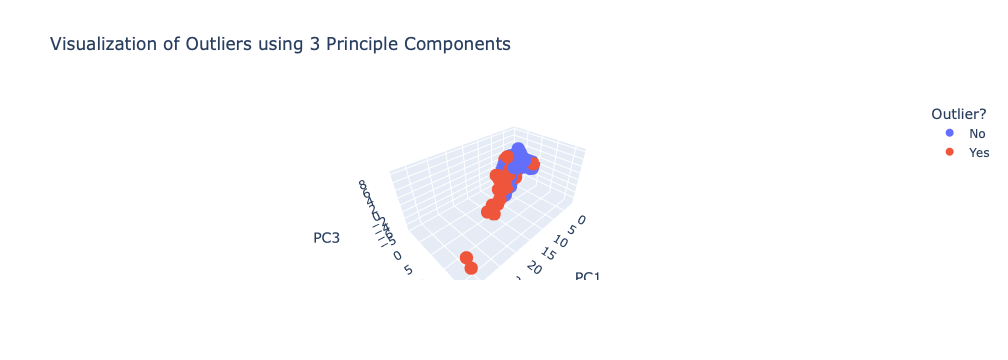

In [26]:
vizualize_outlier_detect(file, file_wo_Outlier_IF)

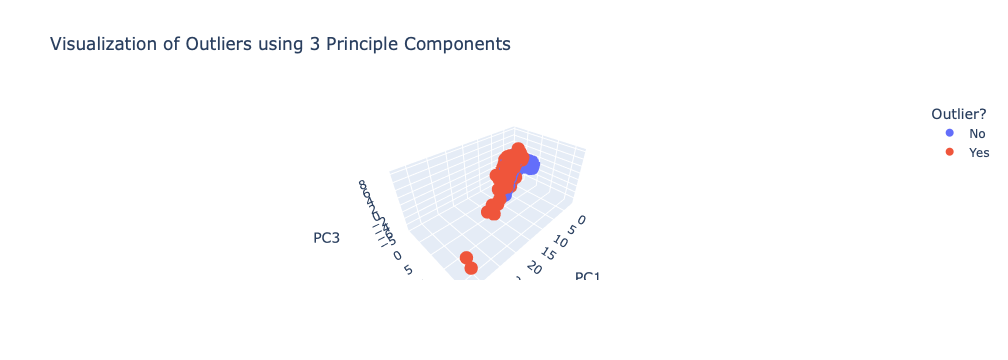

In [27]:
vizualize_outlier_detect(file, file_wo_Outlier_DB)

In [28]:
file1 = pd.read_csv("train.csv")
file1 = file1["Buy"].to_list()
file_w_Buy = file
file_w_Buy["Buy"] = file1

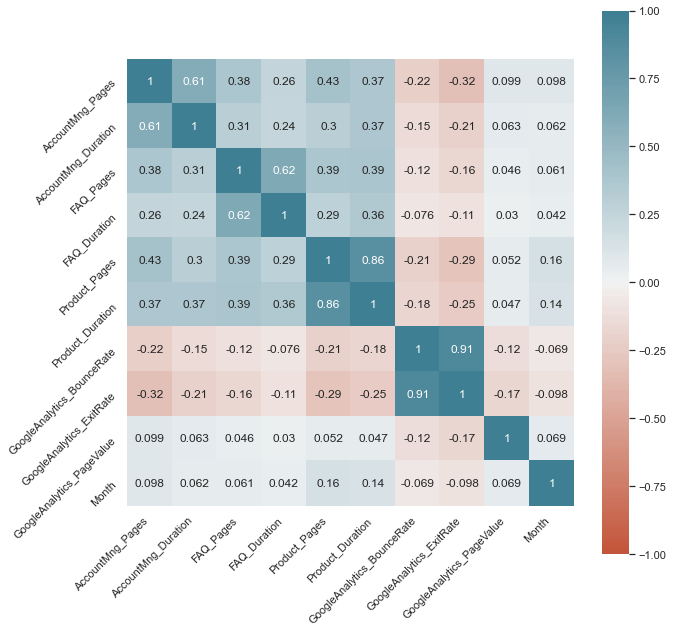

In [29]:
Correlation_heatmap(file_w_Buy)

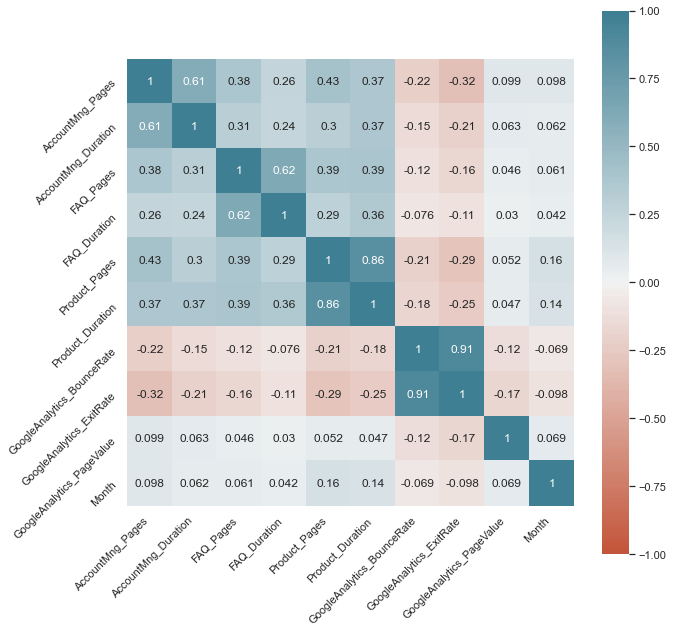

In [30]:
Correlation_heatmap(file_wo_Outlier_IF)

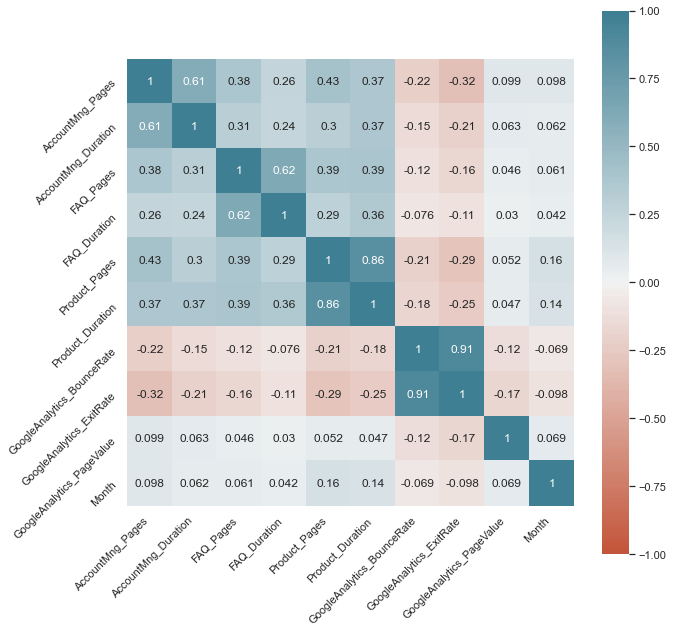

In [31]:
Correlation_heatmap(file_wo_Outlier_DB)

### GradientBoost

In [32]:
file,metric_cols,nonmetric_cols = prep1("train.csv")
file = group_Browser(file)
file = group_Type_of_Traffic(file)
file = group_OS(file)
file_wo_Outlier_IF = IsolationTreez3(file,metric_cols, 0.01,nonmetric_cols)
file_wo_Outlier_DB = remove_outliers_DBScan(file,metric_cols,nonmetric_cols,eps=0.25,mi_sample = 17)

<ipython-input-2-b3baa90ea779>:23: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



 1    9899
-1     100
Name: iforest, dtype: int64
{-1: 91, 0: 9908}


In [33]:
X = file_wo_Outlier_IF.drop("Buy",axis = 1)
y = file_wo_Outlier_IF["Buy"]

#### LabelEncode

In [34]:
X = EncodeLabel(X,["Country","Type_of_Visitor","OS"])

#### KNN

In [35]:
#import
file = pd.read_csv("https://www.dropbox.com/s/7sn6lb937l9rkbs/train.csv?dl=1")
file.set_index("Access_ID",inplace=True)
file["Date"]= pd.to_datetime(file["Date"])
file["Weekday"]=file["Date"].dt.weekday
file["Month"]=file["Date"].dt.month
file["Day"]=file["Date"].dt.day
#file['Covid'] = np.where((file['Date'] >= '01-May-20'),1,0)
file = file.drop(columns=["Date"])

non_metric=["OS","Type_of_Traffic","Type_of_Traffic","Browser","Country","Weekday","Month","LotMonth","Is31","Buy","Type_of_Visitor","Covid"]
metric = [el for el in file.columns if el not in non_metric]

filepp = remove_outliers_DBScan(file,metric,non_metric,eps=0.265,mi_sample = 17)

y = filepp["Buy"].copy()
X = filepp.drop("Buy",axis=1)

to_encode = ["Country","OS","Type_of_Visitor"]

X.loc[:,to_encode] = X[to_encode].astype("category")
X["Country"] = X["Country"].cat.codes
X["Type_of_Visitor"] = X["Type_of_Visitor"].cat.codes
X["OS"] = X["OS"].cat.codes
to_one_hot_enc = ['OS','Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor', 'Weekday']
#X = pd.get_dummies(X,columns=to_one_hot_enc)

{-1: 90, 0: 9909}


In [37]:
#Try different feature selection methods and get the selected columns
#Best perfoming one is by lity probab

from sklearn.feature_selection import SelectPercentile, f_classif
selection=SelectPercentile(score_func=f_classif, percentile=14)
selection.fit_transform(X,y)

columns = np.asarray(X.columns.values)
support = np.asarray(selection.get_support())
columns_with_support = columns[support]

In [38]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score


best_k = dict()
for k in range(1,23):
    knn = make_pipeline(
       SelectPercentile(score_func=f_classif, percentile=14),
       Binarizer(),
       KNeighborsClassifier(n_neighbors=k, p=1, weights="uniform")
    )
    best_k[k] = cross_val_score(knn, X, y, cv=5,scoring="f1").mean()
    
print(best_k)

{1: 0.28757606642123007, 2: 0.16247130451646816, 3: 0.16247130451646816, 4: 0.16247130451646816, 5: 0.4104063133115815, 6: 0.2854471217064514, 7: 0.4105518836112133, 8: 0.4105518836112133, 9: 0.4105518836112133, 10: 0.4105518836112133, 11: 0.5355110752163436, 12: 0.4105518836112133, 13: 0.4105518836112133, 14: 0.4105518836112133, 15: 0.5355110752163436, 16: 0.5355110752163436, 17: 0.6614905937693425, 18: 0.6614905937693425, 19: 0.6614905937693425, 20: 0.6614905937693425, 21: 0.6614905937693425, 22: 0.6614905937693425}


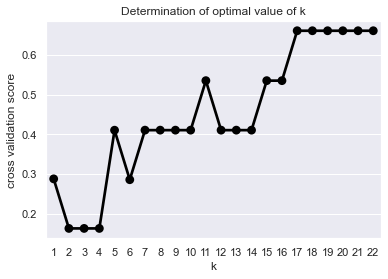

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
sns.pointplot(data=pd.DataFrame([best_k.values(),range(1,23)],index=["cross validation score","k"]).T,x="k",y="cross validation score",color="black")
plt.title("Determination of optimal value of k")
ax.set_xticklabels(range(1,23))
plt.savefig('kvalue.jpg')

#### MLP

In [41]:
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier

mlp = make_pipeline(
SelectFromModel(estimator=ExtraTreesClassifier(criterion="gini", max_features=0.75, n_estimators=100), threshold=0.3),
MLPClassifier(alpha=0.1, learning_rate_init=0.5))

cross_val_score(mlp, X, y, cv=5,scoring="f1").mean()

selection=SelectFromModel(estimator=ExtraTreesClassifier(criterion="gini", max_features=0.7500000000000001, n_estimators=100))
selection.fit_transform(X,y)

columns = np.asarray(X.columns.values)
support = np.asarray(selection.get_support())
columns_with_support = columns[support]

### DecisionTree

In [65]:
file,metric_cols,nonmetric_cols = prep1("train.csv")
#file = group_Browser(file)
#file = group_Type_of_Traffic(file)
#file = group_OS(file)
X = file_wo_Outlier_IF.drop("Buy",axis = 1)
y = file_wo_Outlier_IF["Buy"]
X = EncodeLabel(X,["Country","Type_of_Visitor","OS"])

<ipython-input-2-b3baa90ea779>:23: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



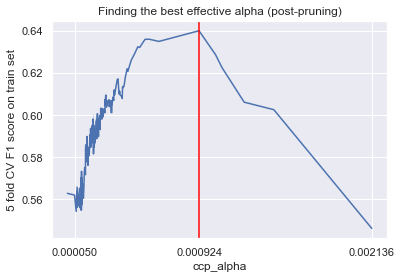

In [135]:
#Postpruning decision tree

path = DecisionTreeClassifier().cost_complexity_pruning_path(X, y)
cv_scores=list()
for alpha in path["ccp_alphas"]:
    model = DecisionTreeClassifier(ccp_alpha=alpha)
    cv_scores.append(cross_val_score(model,X,y,scoring = "f1",cv=5,n_jobs = -1).mean())

 
sns.lineplot(x=list(path["ccp_alphas"][:-4]),y=cv_scores[:-4])
optimal_ccp_alpha = path["ccp_alphas"][-10]
plt.axvline(optimal_ccp_alpha,color="red")
plt.xticks([path["ccp_alphas"][1],optimal_ccp_alpha,path["ccp_alphas"][-5]])
plt.xlabel("ccp_alpha")
plt.ylabel("5 fold CV F1 score on train set")
plt.title("Finding the best effective alpha (post-pruning)")
plt.show()

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
best_model = make_pipeline(
    VarianceThreshold(threshold=0.2),
    PCA(iterated_power=3, svd_solver="randomized"),
    DecisionTreeClassifier(criterion="entropy", max_depth=1, min_samples_leaf=4, min_samples_split=7))
cv = RepeatedStratifiedKFold(n_splits=20,n_repeats=2)
scores = cross_val_score(best_model,X.values,y,scoring = "f1",cv=cv,n_jobs = -1)
scores.mean()

0.6582001609487691

In [44]:
ranking_df, list_best_features = feature_importants_RFE(file,"Buy",DecisionTreeClassifier(criterion="entropy", max_depth=1, min_samples_leaf=4, min_samples_split=7))
ranking_df

Perfect number of features: 1
Score with 1 features: 0.8683333333333333


Columnsi  Important  ranking
8    GoogleAnalytics_PageValue       True        1
15                        Is31      False        2
14                    LotMonth      False        3
13                       Covid      False        4
12                       Month      False        5
11                     Weekday      False        6
10             Type_of_Traffic      False        7
9                      Browser      False        8
7     GoogleAnalytics_ExitRate      False        9
6   GoogleAnalytics_BounceRate      False       10
5             Product_Duration      False       11
4                Product_Pages      False       12
3                 FAQ_Duration      False       13
2                    FAQ_Pages      False       14
1          AccountMng_Duration      False       15
0             AccountMng_Pages      False       16

In [45]:
ranking_df, list_best_features = feature_importants_RFE(file,"Buy",DecisionTreeClassifier())
ranking_df

Perfect number of features: 1
Score with 1 features: 0.8663333333333333


Columnsi  Important  ranking
8    GoogleAnalytics_PageValue       True        1
5             Product_Duration      False        2
7     GoogleAnalytics_ExitRate      False        3
1          AccountMng_Duration      False        4
4                Product_Pages      False        5
6   GoogleAnalytics_BounceRate      False        6
0             AccountMng_Pages      False        7
12                       Month      False        8
3                 FAQ_Duration      False        9
11                     Weekday      False       10
10             Type_of_Traffic      False       11
9                      Browser      False       12
2                    FAQ_Pages      False       13
14                    LotMonth      False       14
13                       Covid      False       15
15                        Is31      False       16

In [48]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.2)
selector.fit_transform(X)
len(selector.get_feature_names_out())

AttributeError: 'VarianceThreshold' object has no attribute 'get_feature_names_out'

In [49]:
selector.get_feature_names_out()

AttributeError: 'VarianceThreshold' object has no attribute 'get_feature_names_out'

In [50]:
len(X.columns)

19

#### RandomForestClassifier

In [51]:
file,metric_cols,nonmetric_cols = prep1("train.csv")
file = group_Browser(file)
file = group_Type_of_Traffic(file)
file = group_OS(file)

X = file.drop("Buy",axis = 1)
y = file["Buy"]
X = EncodeLabel(X,["Country","OS","Type_of_Visitor"])

<ipython-input-2-b3baa90ea779>:23: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



<AxesSubplot:xlabel='Value', ylabel='Col'>

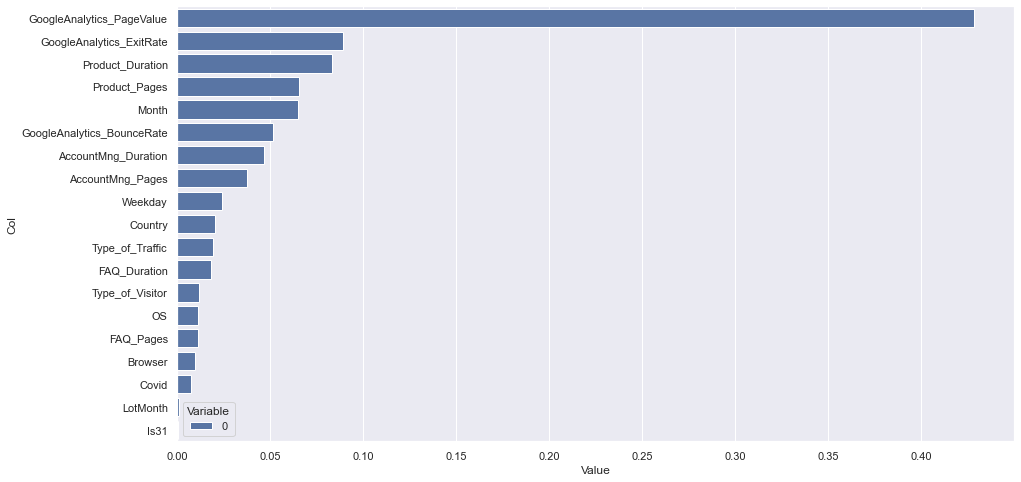

In [53]:
RandFor1 = RandomForestClassifier(bootstrap = True, criterion = "entropy",max_depth=16, min_samples_leaf=4, n_estimators=500,
                     n_jobs=-1, oob_score=True, random_state=42).fit(X.values,y)
importance = RandFor1.feature_importances_

df = pd.DataFrame(importance)
df['col'] = X.columns
df1 = df.melt(id_vars='col').rename(columns=str.title)
df1.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=df1)

In [54]:
ranking_df, list_best_features = feature_importants_RFE(file,"Buy",RandomForestClassifier(bootstrap = True, criterion = "entropy",max_depth=16, min_samples_leaf=4, n_estimators=500,
                     n_jobs=-1, oob_score=True, random_state=42))
ranking_df

Perfect number of features: 15
Score with 15 features: 0.9043333333333333


Columnsi  Important  ranking
0             AccountMng_Pages       True        1
1          AccountMng_Duration       True        1
2                    FAQ_Pages       True        1
3                 FAQ_Duration       True        1
4                Product_Pages       True        1
5             Product_Duration       True        1
6   GoogleAnalytics_BounceRate       True        1
7     GoogleAnalytics_ExitRate       True        1
8    GoogleAnalytics_PageValue       True        1
9                      Browser       True        1
10             Type_of_Traffic       True        1
11                     Weekday       True        1
12                       Month       True        1
13                       Covid       True        1
14                    LotMonth       True        1
15                        Is31      False        2

In [55]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectPercentile,f_classif
from sklearn.preprocessing import OneHotEncoder
#best_model = make_pipeline(
#    SelectPercentile(score_func=f_classif, percentile=36),
#    RandomForestClassifier(bootstrap = True, criterion = "entropy",max_depth=16, min_samples_leaf=4, n_estimators=500,
#                       n_jobs=-1, oob_score=True, random_state=42)
#)
best_model = make_pipeline(
    RFE(estimator=ExtraTreesClassifier(criterion="entropy", max_features=0.05, n_estimators=111), step=0.8),
    RandomForestClassifier(bootstrap = True, criterion = "entropy",max_depth=16, min_samples_leaf=4, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=42))
cv = RepeatedStratifiedKFold(n_splits=20,n_repeats=2)
scores = cross_val_score(best_model,X.values,y,scoring = "f1",cv=cv,n_jobs = -1,verbose=10)
scores.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:   56.1s remaining:   18.7s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:  1.2min remaining:    9.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.2min finished


0.6552106258998707

In [ ]:
scores

In [56]:
best_model.fit(X,y)
file,metric_cols,nonmetric_cols = prep1("test.csv")
file = group_Browser(file)
file = group_Type_of_Traffic(file)
file = group_OS(file)
#X = pd.get_dummies(file,columns = nonmetric_cols)
X = EncodeLabel(file,["Country","OS","Type_of_Visitor"])
# best_model.fit(X)
new_label = best_model.predict(X)
submit = pd.read_csv("sample_submission.csv").set_index("Access_ID")
submit["Buy"] = new_label
submit.to_csv("RFLast.csv")

<ipython-input-2-b3baa90ea779>:23: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



FileNotFoundError: [Errno 2] No such file or directory: 'sample_submission.csv'

In [58]:
RandFor = RandomForestClassifier(bootstrap = True, criterion = "entropy",max_depth=16, min_samples_leaf=4, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=42).fit(X, y)
params = {
    'criterion': ["entropy","gini"],
    'max_depth': [14,15,16,26],
    'min_samples_leaf': [4,6,7,10],
    'n_estimators': [400,500,600]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=RandFor,
                            param_grid=params,
                            cv = 5,
                            n_jobs=-1, verbose=1, scoring="accuracy").fit(X[list_best_features].values, y)

cv = RepeatedStratifiedKFold(n_splits=20,n_repeats=2)
scores = cross_val_score(grid_search.best_estimator_,X[list_best_features].values,y,scoring = "f1",cv=cv,n_jobs = -1,verbose=8)

ValueError: Found input variables with inconsistent numbers of samples: [2300, 9999]

In [ ]:
grid_search.best_estimator_

In [ ]:
scores.mean()

### GradientBoostingClassifier

In [1]:
file,metric_cols,nonmetric_cols = prep1("train.csv")
file = group_Browser(file)
file = group_Type_of_Traffic(file)
file = group_OS(file)

X = file.drop("Buy",axis = 1)
y = file["Buy"]
X = EncodeLabel(X,["Country","OS","Type_of_Visitor"])

NameError: name 'prep1' is not defined

In [2]:
ranking_df, list_best_features = feature_importants_RFE(file,"Buy",GradientBoostingClassifier())
ranking_df

NameError: name 'feature_importants_RFE' is not defined

In [ ]:
GBB = GradientBoostingClassifier(learning_rate=0.05,min_samples_leaf = 40, subsample = 0.9,min_samples_split = 1200, n_estimators = 260,max_depth=9,max_features='sqrt', random_state=38)
cv = RepeatedStratifiedKFold(n_splits=20,n_repeats=2)
scores = cross_val_score(GBB,X[list_best_features].values,y,scoring = "f1",cv=cv,n_jobs = -1,verbose=10)
scores.mean()

In [ ]:
GBB.fit(X[list_best_features],y)
file,metric_cols,nonmetric_cols = prep1("test.csv")
file = group_Browser(file)
file = group_Type_of_Traffic(file)
file = group_OS(file)
#X = pd.get_dummies(file,columns = nonmetric_cols)
X = EncodeLabel(file,["Country","OS","Type_of_Visitor"])
# best_model.fit(X)
new_label = GBB.predict(X[list_best_features])
submit = pd.read_csv("sample_submission.csv").set_index("Access_ID")
submit["Buy"] = new_label
submit.to_csv("GBLast.csv")

### Stacking

In [60]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [
    ('gb', GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features=0.85, min_samples_leaf=11, min_samples_split=20, n_estimators=100, subsample=0.55)),
    ('dt', DecisionTreeClassifier(criterion="entropy", max_depth=1, min_samples_leaf=12, min_samples_split=2))]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())
cv = RepeatedStratifiedKFold(n_splits=20,n_repeats=2)
scores = cross_val_score(clf,X.values,y,scoring = "f1",cv=cv,n_jobs = -1)
scores.mean()

ValueError: Found input variables with inconsistent numbers of samples: [2300, 9999]

Stacking

In [61]:
def get_pred_of_model_on_trainset(model,classifier):  
    import pandas as pd
    import numpy as np
    def remove_outliers_DBScan(df,metric_ft,nonmetric_columns,eps=0.027,mi_sample = 5):
        from sklearn.cluster import DBSCAN
        #fill nan with median of column
        data = df.copy()

        for col in metric_ft:
                data[col].fillna(data[col].median(),inplace=True)

        #Normalize the metric features of the data so that differetn scales dont influence the distance metrics that DBScan uses
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler() #Normalize data with min max scaler
        df_normalize = scaler.fit_transform(data[metric_ft])

       #fit DBScan to the data
        from sklearn.cluster import DBSCAN
        outlier_detection = DBSCAN(
          eps = eps,
          metric="euclidean",
          min_samples = mi_sample,
          n_jobs = -1)
        clusters = outlier_detection.fit_predict(df_normalize)

        unique, counts = np.unique(clusters, return_counts=True)
        print(dict(zip(unique, counts)))
        data["cluster"] = clusters
        return df[data["cluster"]!= -1], dict(zip(unique, counts))

    file = pd.read_csv("https://www.dropbox.com/s/7sn6lb937l9rkbs/train.csv?dl=1")
    file.set_index("Access_ID",inplace=True)
    file["Date"]= pd.to_datetime(file["Date"])
    file["Weekday"]=file["Date"].dt.weekday
    file["Month"]=file["Date"].dt.month
    file["Day"]=file["Date"].dt.day
    #file['Covid'] = np.where((file['Date'] >= '01-May-20'),1,0)
    file = file.drop(columns=["Date"])

    non_metric=["OS","Type_of_Traffic","Type_of_Traffic","Browser","Country","Weekday","Month","LotMonth","Is31","Buy","Type_of_Visitor","Covid"]
    metric = [el for el in file.columns if el not in non_metric]

    filepp,_ = remove_outliers_DBScan(file,metric,non_metric,eps=0.265,mi_sample = 17)

    y = filepp["Buy"].copy()
    X = filepp.drop("Buy",axis=1)

    to_encode = ["Country","OS","Type_of_Visitor"]

    X.loc[:,to_encode] = X[to_encode].astype("category")
    X["Country"] = X["Country"].cat.codes
    X["Type_of_Visitor"] = X["Type_of_Visitor"].cat.codes
    X["OS"] = X["OS"].cat.codes
    to_one_hot_enc = ['OS','Browser', 'Country', 'Type_of_Traffic', 'Type_of_Visitor', 'Weekday']
    #X = pd.get_dummies(X,columns=to_one_hot_enc)
    model.fit(X,y)
    predictions = model.predict(X)
    return pd.DataFrame(predictions,columns=[classifier],index=X.index)

In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import Binarizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold
import tpot
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from tpot.builtins import StackingEstimator
from sklearn.ensemble import AdaBoostClassifier

pred_bagging = get_pred_of_model_on_trainset(BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion= 'entropy',
max_depth= 5,
min_samples_leaf= 7,
min_samples_split= 4),
bootstrap_features= False,
max_features= 1.0,
max_samples= 0.6,
n_estimators= 122),"Bagging")

pred_knn = get_pred_of_model_on_trainset(make_pipeline(SelectPercentile(score_func=f_classif, percentile=14),
Binarizer(threshold=1.0),KNeighborsClassifier(n_neighbors=17, p=1)),"knn")

pred_lr = get_pred_of_model_on_trainset(make_pipeline(SelectFromModel(estimator=ExtraTreesClassifier(criterion="gini", max_features=0.6, n_estimators=100), threshold=0.05),
Binarizer(threshold=0.95),
LogisticRegression(C=0.5, dual=False, penalty="l2"))
,"logistic")

pred_nb = get_pred_of_model_on_trainset(make_pipeline(

SelectFromModel(estimator=ExtraTreesClassifier(criterion="entropy", max_features=0.6, n_estimators=100), threshold=0.2),

RBFSampler(gamma=0.05),

GaussianNB()

),"naive bayesian")

pred_adaboost=get_pred_of_model_on_trainset(AdaBoostClassifier(algorithm='SAMME', learning_rate= 0.97, n_estimators= 2),"AdaBoost")

pred_dt = get_pred_of_model_on_trainset(make_pipeline(
    VarianceThreshold(threshold=0.2),
    PCA(iterated_power=3, svd_solver="randomized"),
    DecisionTreeClassifier(criterion="entropy", max_depth=1, min_samples_leaf=4, min_samples_split=7)
),"Decision_Tree")

pred_gb = pd.read_csv("/Users/marcelgeller/Downloads/MarcelischaKeK.csv")
pred_gb.set_index("Access_ID",inplace=True)
pred_gb.columns = ["Gradient_Boosting"]



{-1: 90, 0: 9909}
{-1: 90, 0: 9909}
{-1: 90, 0: 9909}
{-1: 90, 0: 9909}
{-1: 90, 0: 9909}
{-1: 90, 0: 9909}


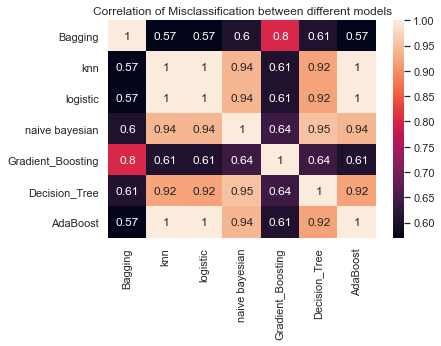

In [63]:
import matplotlib.pyplot as plt
df_cls = y.to_frame().join(pred_bagging,how="left")\
.join(pred_knn,how="left").join(pred_lr,how="left")\
.join(pred_nb,how="left").join(pred_gb,how="left")\
.join(pred_dt,how="left").join(pred_adaboost,how="left")

for col in df_cls.columns.drop("Buy"):
    df_cls.loc[:,col]=df_cls.loc[:,col] - df_cls.loc[:,"Buy"]
    
sns.heatmap(df_cls.loc[:,df_cls.columns.drop("Buy")].corr(),annot=True)
plt.title("Correlation of Misclassification between different models")
plt.savefig("test4.jpg")

Naive Bayes

In [2]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=250)
} 

gnbModel= GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=cvx, scoring='f1')

gnbModel.fit(X, y)

NameError: name 'np' is not defined

Bootstrap Aggregation

In [3]:
Bagging_params = {
          'bootstrap_features': [False, True],
          'max_features': [1.0, 1.5, 1.1],
          'max_samples': [0.6, 0.7, 1.0],
          'n_estimators': [120, 108, 101],}

Bagging = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), bc_params, cv=5, verbose=10, scoring="f1")

Bagging.fit(X,y)
#Best params were Bootstrap:False, Max-Features:1.0,Max_samples:0.6, Number of Estimators:120


NameError: name 'GridSearchCV' is not defined

In [ ]:
bc_params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False],
          'max_features': [1.0],
          'max_samples': [ 0.6],
          'n_estimators': [103],
}
# to further improve our model we need to find the params for the base estiamtor

Bagging1 = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), bc_params, cv=5, verbose=10, scoring='f1')
Bagging1.fit(X,y)

Adaboost

In [ ]:
AdaBoostparameters = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}
AdaBoostModel = GridSearchCV(ab_clf, AdaBoostparameters, cv=5, verbose=10, scoring='f1')
AdaBoostModel.fit(X, y)
#AdaBoostClassifier(algorithm='SAMME', learning_rate=1.03, n_estimators=10) Best Result